In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still chang

torch.Size([3, 100, 100])


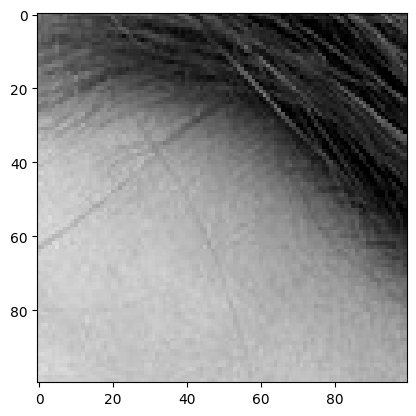

In [1]:
from data import get_img_transforms_train, get_img_transforms_train_target, BigImagesDataset,  get_img_transforms_test, get_img_transforms_test_target, BigImagesDataModule
import config.config as config
import matplotlib.pyplot as plt
from utils import convert_rgb_tensor_for_plot


train_transforms = get_img_transforms_train(100)
train_target_transforms = get_img_transforms_train_target(100)
ds_train = BigImagesDataset(str(config.TRAINING_IMGS_DIR), train_transforms, train_target_transforms)

in_img, target, label = ds_train[100]
plt.imshow(convert_rgb_tensor_for_plot(in_img))
print(ds_train[0][0].shape)

Image([[[0.5143, 0.5922, 0.5502,  ..., 0.7299, 0.7839, 0.7599],
        [0.5382, 0.6161, 0.5922,  ..., 0.6461, 0.6760, 0.6461],
        [0.5742, 0.6221, 0.5981,  ..., 0.8438, 0.6640, 0.7779],
        ...,
        [0.1548, 0.1548, 0.1668,  ..., 0.3345, 0.3405, 0.3345],
        [0.1788, 0.1907, 0.2087,  ..., 0.3345, 0.3046, 0.3046],
        [0.1728, 0.1668, 0.1907,  ..., 0.3106, 0.2806, 0.3046]]], )


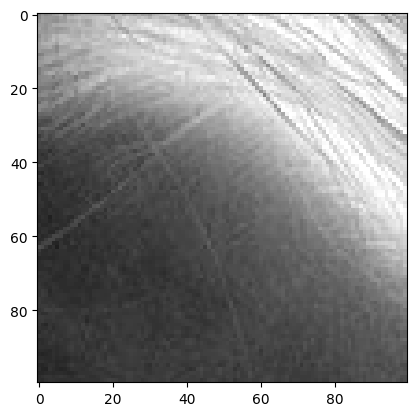

In [2]:
plt.imshow(target[0].detach().numpy(), cmap="gray", vmin=0, vmax=1)
print(target)


In [3]:
module = BigImagesDataModule(str(config.TRAINING_IMGS_DIR), 224, 2)
module.setup("train")
dataloader_test = module.test_dataloader()
print(len(dataloader_test))
for batch in dataloader_test:
    img, target, label = batch
    print(img.shape, target.shape, label.shape, sep="\n")
    break


157
torch.Size([2, 3, 224, 224])
torch.Size([2, 1, 224, 224])
torch.Size([2])


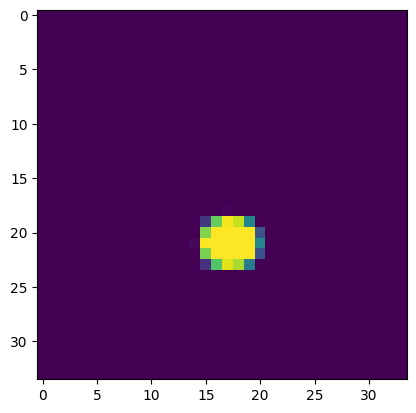

Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached


In [ ]:
from utils import load_transp_conv_weights
import config.config as config
import matplotlib.pyplot as plt
# print(load_transp_conv_weights(str(config.FONT_PATH), 34, config.TYPEWRITER_CONFIG["letterList"])[0][0])
convs = load_transp_conv_weights(str(config.FONT_PATH), 34, config.TYPEWRITER_CONFIG["letterList"])
plt.imshow(convs[0][0].numpy())


In [5]:
from models import NeuralNetwork
import config.config as config
import matplotlib.pyplot as plt

net = NeuralNetwork(str(config.FONT_PATH), 64, round(64*0.035), 1, config.TYPEWRITER_CONFIG["letterList"])



/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
import torch

test_input = torch.randn(1, 3, 10, 10)
output, type_hits = net(test_input)
plt.imshow(output.detach().numpy()[0][0])
print(output.shape)
print(type_hits.shape)
print(type_hits[0][:])

ValueError: not enough values to unpack (expected 3, got 2)

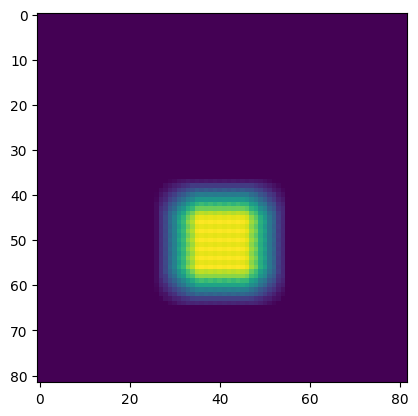

In [61]:
input_tensor = torch.zeros(1, 100, 10, 10)
input_tensor[0][0][:] = 0.5

output_transp = net.transp_conv(input_tensor)
plt.imshow(output_transp.detach().numpy()[0][0])

In [ ]:
from utils import TypeRLoss

loss = TypeRLoss(5, 1, 0.1, )